# Convolutional Neural Network
Understanding CNN better

In [2]:
from keras.layers import *
from keras.models import Sequential

Using TensorFlow backend.


In [3]:

model= Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
________________________________________________

# Dataset

In [4]:
from keras.utils import to_categorical
from keras.datasets import mnist

In [5]:
(Xtrain, Ytrain),(Xtest,Ytest) = mnist.load_data()


In [6]:
print(Xtrain.shape,Ytrain.shape)
print(Xtest.shape,Ytest.shape)

def preprocessing(X,Y):
    X= X.reshape((-1,28,28,1))
    X= X/255.0
    Y= to_categorical(Y)
    return X,Y
Xtrain,Ytrain=preprocessing(Xtrain,Ytrain)
print(Xtrain.shape,Ytrain.shape)
Xtest,Ytest=preprocessing(Xtest,Ytest)
print(Xtest.shape,Ytest.shape)


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
(60000, 28, 28, 1) (60000, 10)
(10000, 28, 28, 1) (10000, 10)


0


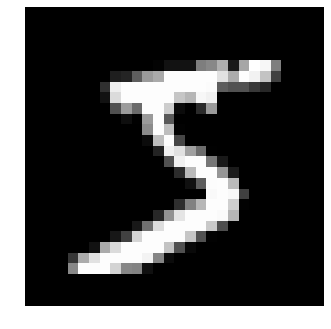

1


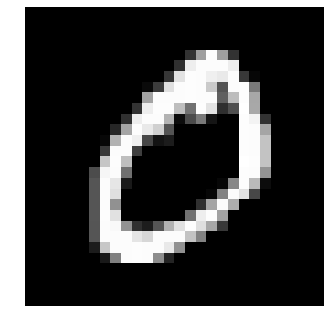

2


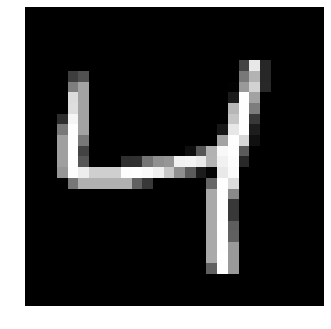

3


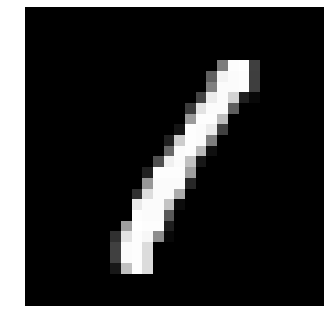

4


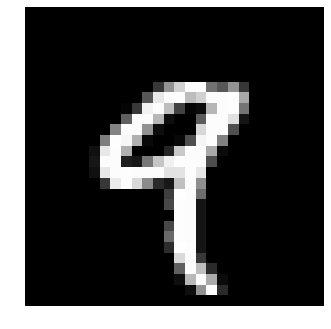

5


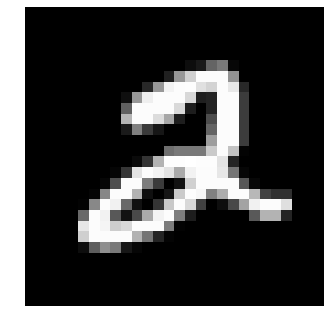

6


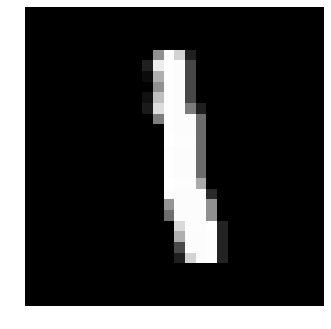

7


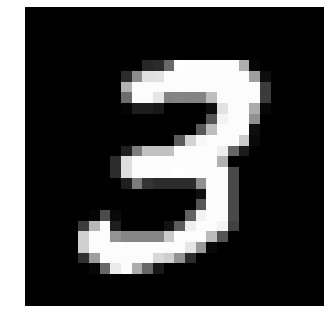

8


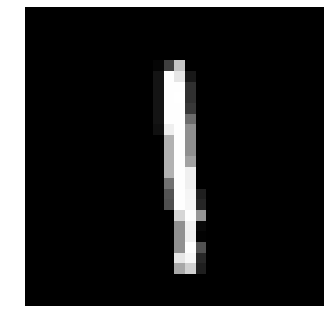

9


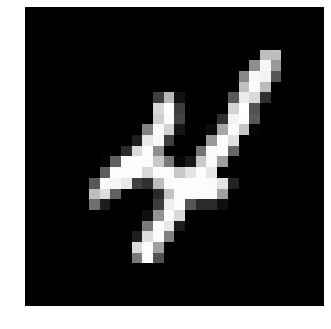

10


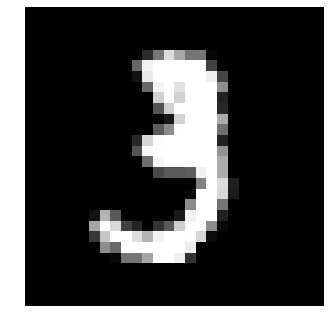

11


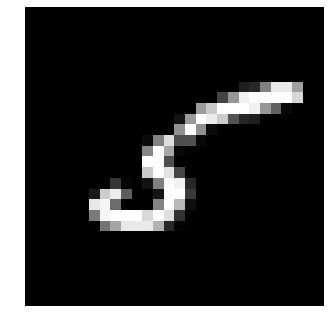

12


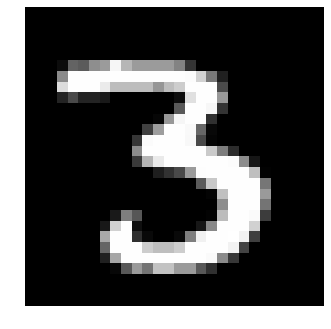

13


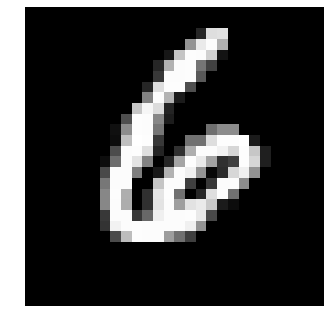

14


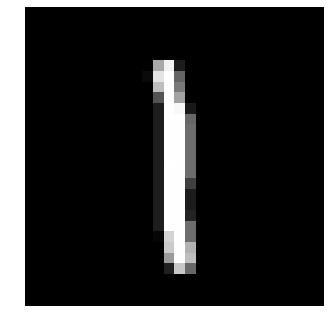

In [29]:
import matplotlib.pyplot as plt
def drawimg(img ):
    plt.imshow(img, cmap='gray')
    plt.style.use('seaborn')
    #plt.title(title)
    plt.axis('off')
    plt.show()
for i in range(15):
    print(i)
    drawimg(Xtrain[i].reshape((28,28)))

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist= model.fit(Xtrain,Ytrain, batch_size=256,epochs=20, validation_split=0.1)

Instructions for updating:
Use tf.cast instead.
Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 11s 211us/step - loss: 0.3767 - accuracy: 0.8874 - val_loss: 0.0855 - val_accuracy: 0.9750
Epoch 2/20
54000/54000 [==============================] - 8s 142us/step - loss: 0.0816 - accuracy: 0.9750 - val_loss: 0.0600 - val_accuracy: 0.9823
Epoch 3/20
54000/54000 [==============================] - 8s 144us/step - loss: 0.0529 - accuracy: 0.9836 - val_loss: 0.0459 - val_accuracy: 0.9860
Epoch 4/20
54000/54000 [==============================] - 8s 144us/step - loss: 0.0453 - accuracy: 0.9857 - val_loss: 0.0469 - val_accuracy: 0.9852
Epoch 5/20
54000/54000 [==============================] - 8s 143us/step - loss: 0.0341 - accuracy: 0.9891 - val_loss: 0.0399 - val_accuracy: 0.9875
Epoch 6/20
54000/54000 [==============================] - 8s 143us/step - loss: 0.0275 - accuracy: 0.9913 - val_loss: 0.0341 - val_accuracy: 0.9905
Epoch 7/20
540

Text(0, 0.5, 'loss')

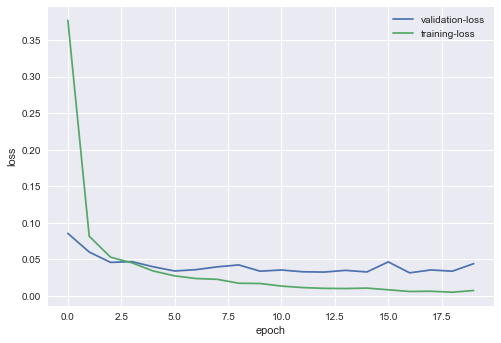

In [13]:
h= hist.history
import matplotlib.pyplot as plt
plt.plot(h['val_loss'], label='validation-loss')
plt.plot(h['loss'], label='training-loss')
plt.legend()
plt.style.use('seaborn')
plt.xlabel('epoch')
plt.ylabel('loss')

Text(0, 0.5, 'loss')

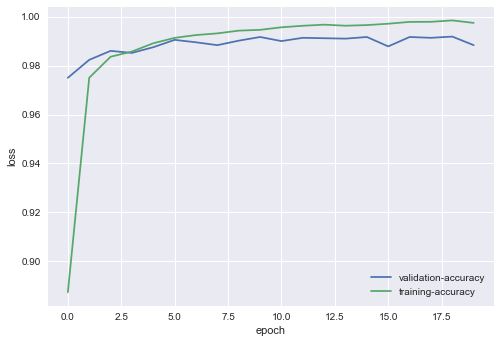

In [14]:
h= hist.history
import matplotlib.pyplot as plt
plt.plot(h['val_accuracy'], label='validation-accuracy')
plt.plot(h['accuracy'], label='training-accuracy')
plt.legend()
plt.style.use('seaborn')
plt.xlabel('epoch')
plt.ylabel('loss')

In [15]:
print(h['accuracy'])

[0.8874074, 0.9750185, 0.98359257, 0.98572224, 0.9891111, 0.9913148, 0.992463, 0.99314815, 0.99425924, 0.9945926, 0.9956296, 0.9962593, 0.9967037, 0.99627775, 0.996537, 0.9970926, 0.9978333, 0.9978704, 0.99844444, 0.9974259]


In [26]:
import numpy as np
Y_=model.predict(Xtest)
print(Y_.shape)
Y_= np.argmax(Y_,axis=1)
print(Y_.shape)
Y_= to_categorical(Y_)
accuracy=np.sum((Ytest==Y_),axis=1)
accuracy=(np.sum((accuracy==10))/Ytest.shape[0])*100
print(accuracy)

(10000, 10)
(10000,)
98.9
